<a href="https://colab.research.google.com/github/Rohan-69108/Amazon-stock-price-prediction-/blob/main/amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Plotting
%matplotlib inline

import warnings #What to do with warnings
warnings.filterwarnings("ignore") #Ignore the warnings

plt.rcParams["figure.figsize"] = (10,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot") #Define the style of the plot

from statsmodels.tsa.seasonal import seasonal_decompose #Describes the time data
from statsmodels.tsa.stattools import adfuller #Check if data is stationary
from statsmodels.graphics.tsaplots import plot_acf #Compute lag for ARIMA
from statsmodels.graphics.tsaplots import plot_pacf #Compute partial lag for ARIMA
from statsmodels.tsa.arima_model import ARIMA #Predictions and Forecasting


In [ ]:
amazon=pd.read_csv("/content/drive/MyDrive/Data set/Amazon.csv")
amazon.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [ ]:
amazon.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
amazon.shape

(5842, 7)

In [ ]:
print(amazon.isnull().any())              #checking for null values
#no null values

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [ ]:
#create subsets of values i want

In [ ]:
amazonOpen = amazon[["Date", "Open"]].copy() #Get the date and open columns
amazonOpen["Date"] = pd.to_datetime(amazonOpen["Date"]) #Ensure the date data is in datetime format
amazonOpen.set_index("Date", inplace = True) #Set the date to the index
amazonOpen = amazonOpen.asfreq("b") #Set the frequency
amazonOpen = amazonOpen.fillna(method  = "bfill") #Fill null values with future values

#amazonOpen.index #Make sure the frequency remains intact
amazonOpen.head(12) #Take a peek at the open data

,Open
Date,
1997-05-15,2.437500
1997-05-16,1.968750
1997-05-19,1.760417
1997-05-20,1.729167
1997-05-21,1.635417
1997-05-22,1.437500
1997-05-23,1.406250
1997-05-26,1.510417
1997-05-27,1.510417


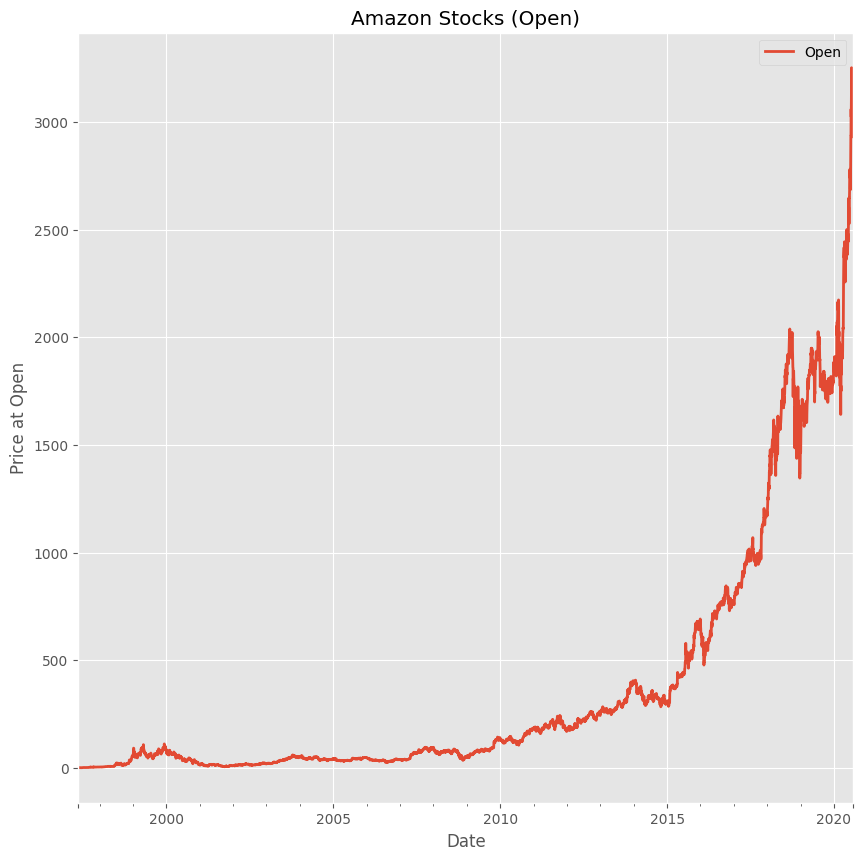

In [ ]:
y = amazonOpen.plot(title = "Amazon Stocks (Open)") #Get an idea of the data
y.set(ylabel = "Price at Open") #Set the y label to open
plt.show() #Show the plot

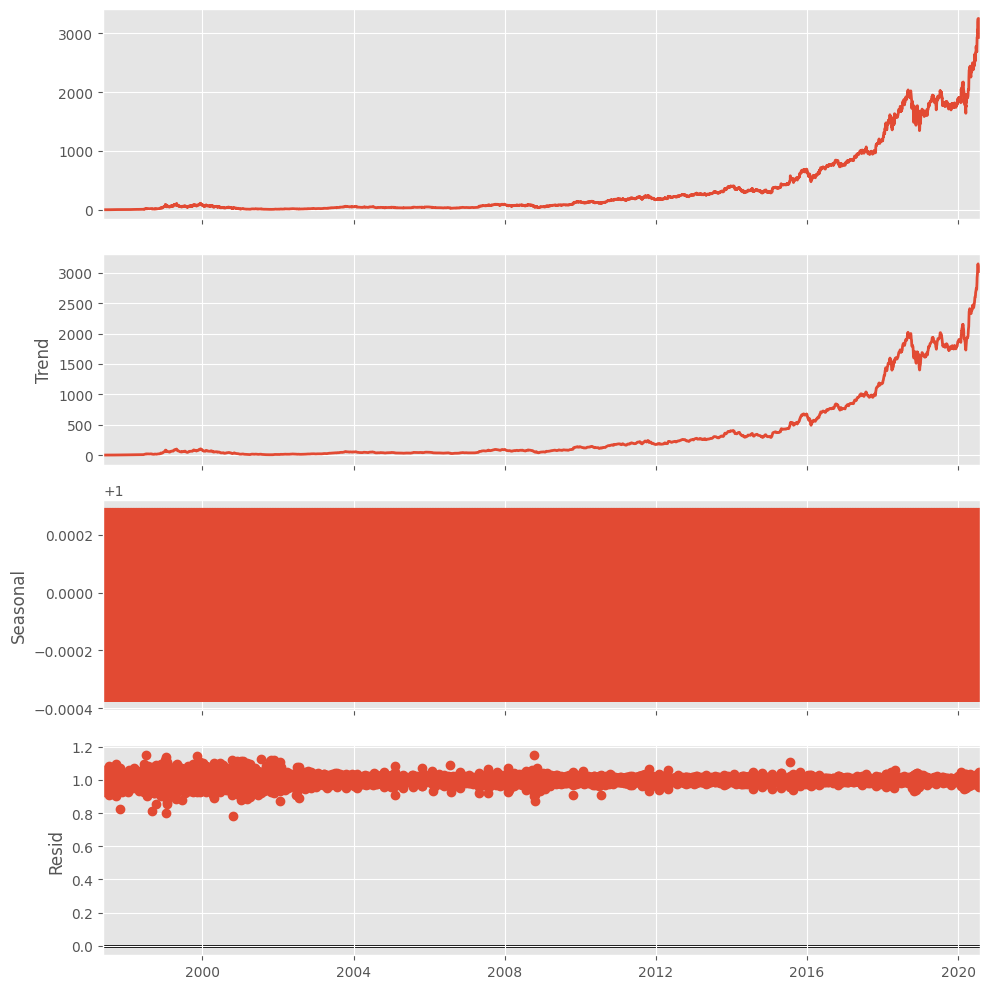

In [ ]:
#Check Trend/Seasonality
decomp = seasonal_decompose(amazonOpen, model = "multiplicative") #Decompose the data
x = decomp.plot() #Plot the decomposed data

In [ ]:
#The seasonal looks like a red blob, but the trend is positive

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(amazonOpen, model='multiplicative', period=252)  # 252 = ~1 trading year

In [ ]:
result = seasonal_decompose(amazonOpen, model='multiplicative', period=252)  # your line

result.trend        # The trend component
result.seasonal     # The seasonal component
result.resid        # The residual/noise component
result.observed     # The original time series


,0
Date,
1997-05-15,2.437500
1997-05-16,1.968750
1997-05-19,1.760417
1997-05-20,1.729167
1997-05-21,1.635417
...,...
2020-07-27,3062.000000
2020-07-28,3054.270020
2020-07-29,3030.989990


In [ ]:
result.trend.head(10)
result.seasonal.tail(5)


,seasonal
Date,
2020-07-27,1.023117
2020-07-28,0.997827
2020-07-29,0.982395
2020-07-30,0.989546
2020-07-31,0.975968


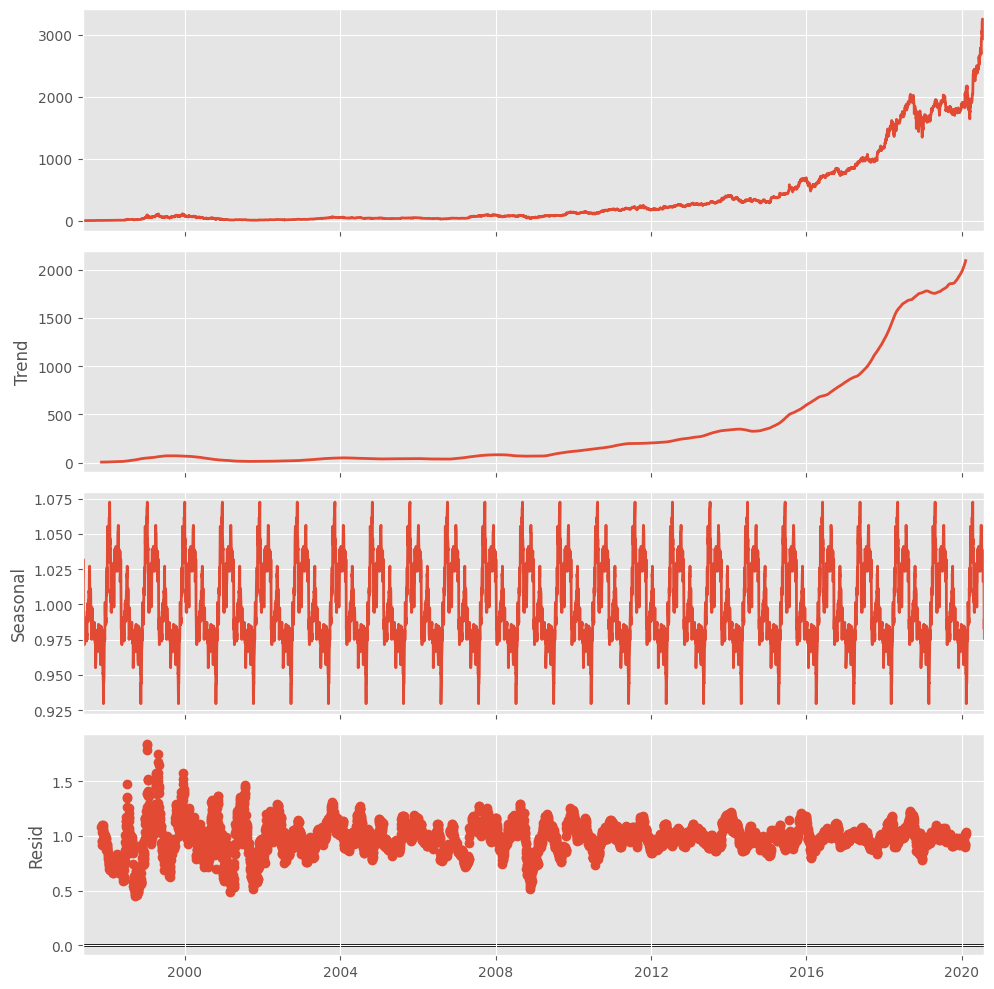

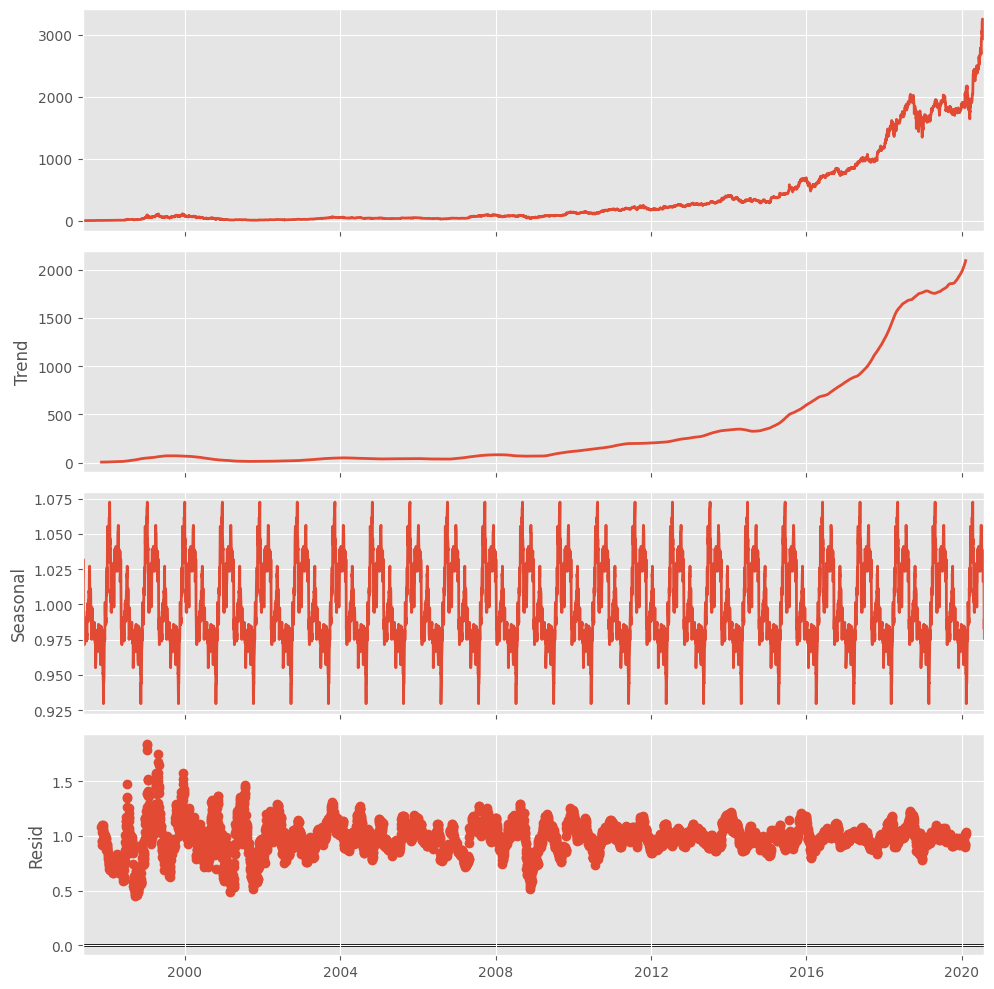

In [ ]:
result.plot()

In [ ]:
#Check if Data is Stationary
print("ADFuller Test; Significance: 0.05") #Print the significance level
adf = adfuller(amazonOpen["Open"]) #Call adfuller to test
print("ADF test static is {}".format(adf[1])) #Print the adfuller results

ADFuller Test; Significance: 0.05
ADF test static is 1.0


In [ ]:
openLog = np.log(amazonOpen)
openDiffSeasonal = openLog - openLog.shift(252)  # 252 = 1 year of trading days
openStationary = openDiffSeasonal - openDiffSeasonal.shift(1)
openStationary = openStationary.dropna()


<Axes: title={'center': 'Seasonally & Trend Stationary Amazon Stock'}, xlabel='Date'>

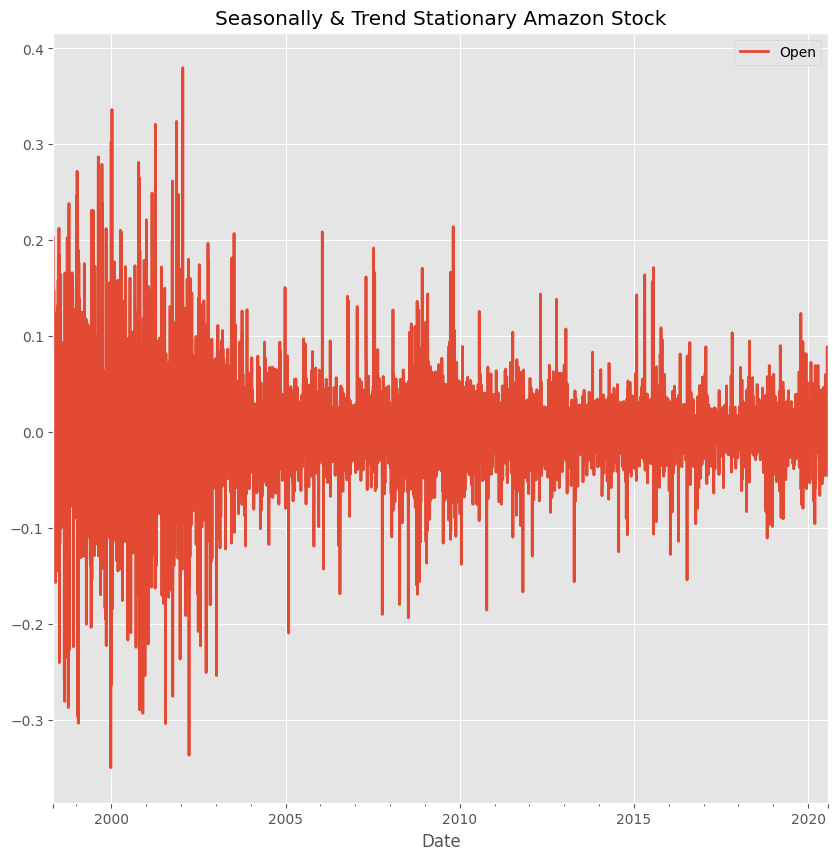

In [ ]:
openStationary.plot(title="Seasonally & Trend Stationary Amazon Stock")


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(openStationary)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -13.194105410635508
p-value: 1.1285066705092126e-24


In [ ]:
#preparation for sarima


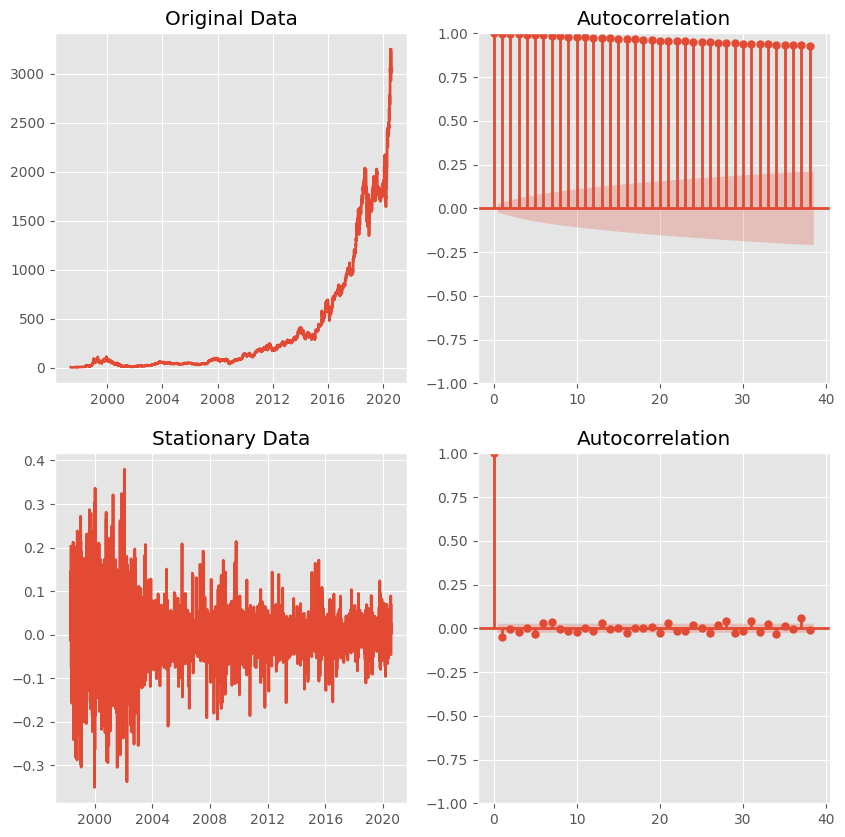

In [ ]:
fig,axes = plt.subplots(2,2) #Set a subset for the data visualizations

a = axes[0,0].plot(amazonOpen["Open"]) #Plot the original data
a = axes[0,0].set_title("Original Data") #Give the original data a name
b = plot_acf(amazonOpen["Open"],ax=axes[0,1]) #Plot the ACF of the original data

x = axes[1,0].plot(openStationary["Open"]) #Plot the stationary data
x = axes[1,0].set_title("Stationary Data") #Give the stationary data a name
y = plot_acf(openStationary["Open"],ax=axes[1,1]) #Plot the ACF of the stationary data

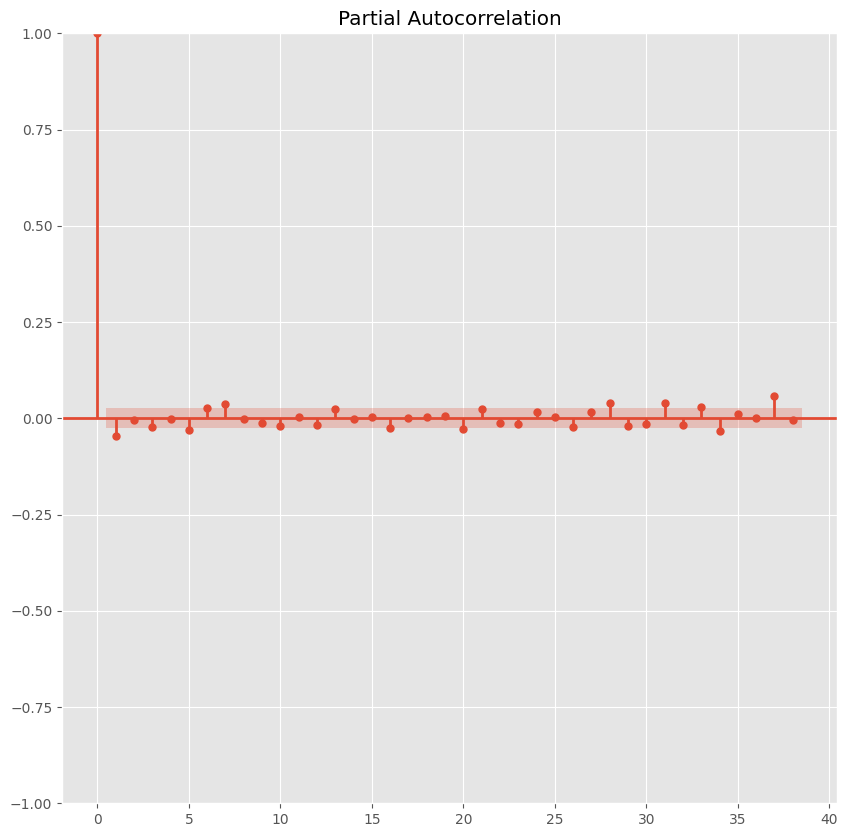

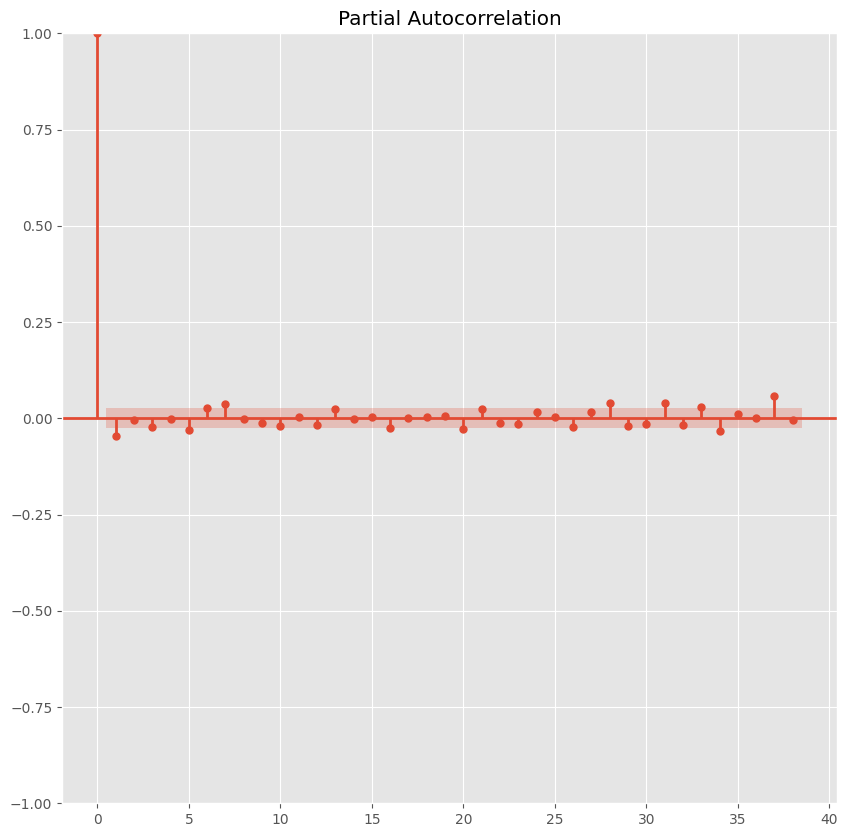

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(openStationary["Open"])


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(openLog, order=(1, 1, 1))  # or use openStationary and set d=0
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 6057
Model:                 ARIMA(1, 1, 1)   Log Likelihood               11281.470
Date:                Tue, 15 Jul 2025   AIC                         -22556.939
Time:                        10:49:59   BIC                         -22536.813
Sample:                    05-15-1997   HQIC                        -22549.953
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5706      0.063     -9.068      0.000      -0.694      -0.447
ma.L1          0.5124      0.065      7.850      0.000       0.384       0.640
sigma2         0.0014   9.94e-06    141.881      0.0

In [ ]:
# This will give predictions for the training set (in-sample forecast)
pred = model_fit.predict(start=1, end=len(openLog)-1, typ='levels')  # 'levels' = original scale



In [ ]:
# Convert predictions from log scale to original scale
pred_original_scale = np.exp(pred)

# If you want to compare with actual values (assuming you have original data)
actual_original_scale = np.exp(openLog)  # Only if openLog = np.log(original_data)


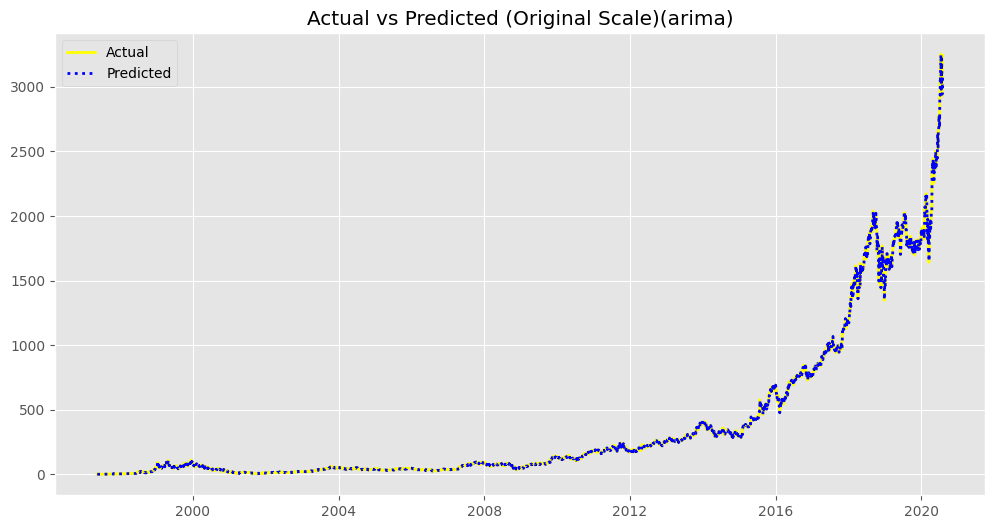

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(actual_original_scale, label='Actual', color='yellow')
plt.plot(pred_original_scale, label='Predicted', color='blue', linestyle=':')
plt.title('Actual vs Predicted (Original Scale)(arima)')
plt.legend()
plt.show()


Ljung-Box Test Results:
       lb_stat  lb_pvalue
10   5.530543   0.853044
15   9.374764   0.857121
20  18.844236   0.531971


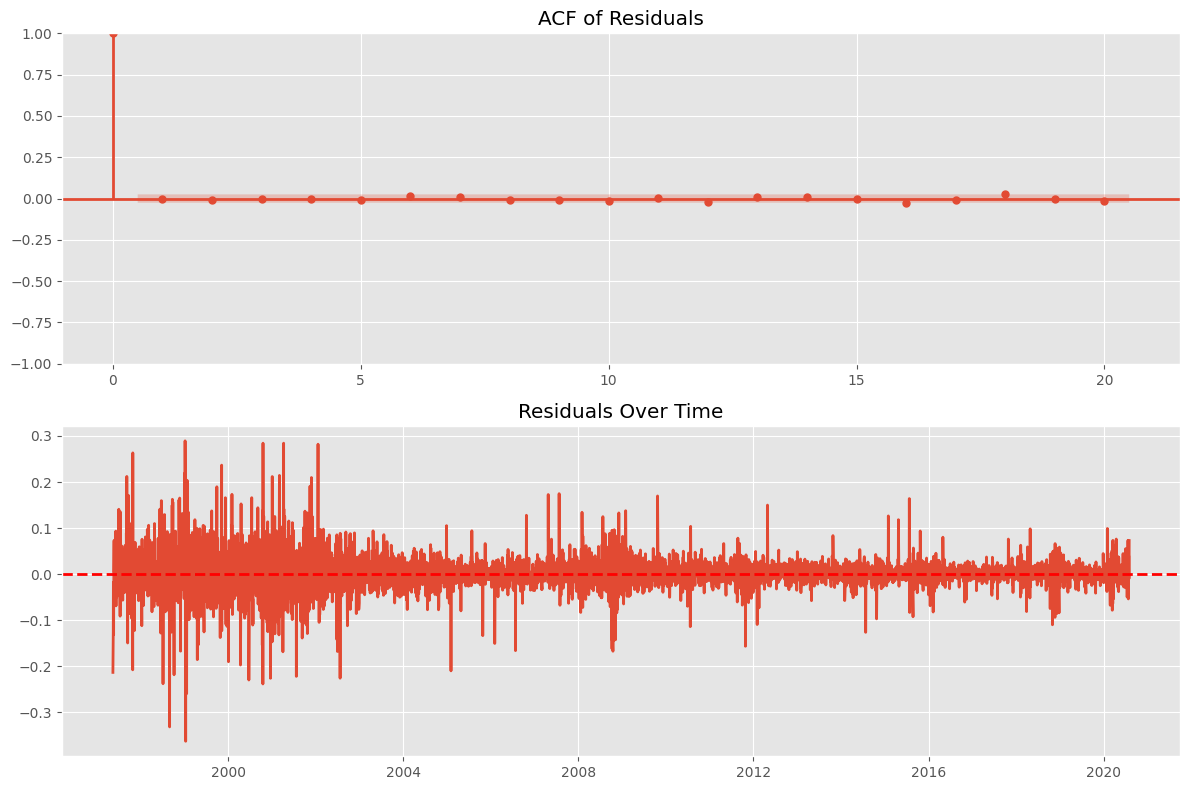

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 1. Get residuals from your ARIMA model
residuals = model_fit.resid[1:]  # Drop first NA value from differencing

# 2. Perform Ljung-Box test (recommended lags: min(20, n//5))
ljung_box_results = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Ljung-Box Test Results:\n", ljung_box_results)

# 3. Visual inspection of residuals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot of residuals
plot_acf(residuals, lags=20, ax=ax1, alpha=0.05)
ax1.set_title('ACF of Residuals')

# Residual plot
ax2.plot(residuals)
ax2.set_title('Residuals Over Time')
ax2.axhline(0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
#reseduals are uncorelated

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Slice actual_original_scale to match the length of pred_original_scale
actual_sliced = actual_original_scale.iloc[1:]

mse = mean_squared_error(actual_sliced, pred_original_scale)
mae = mean_absolute_error(actual_sliced, pred_original_scale)

print("MSE:", mse)
print("MAE:", mae)

MSE: 225.88854354920565
MAE: 5.4882561592299


In [ ]:
rmse = mse**0.5
print("RMSE:", rmse)


RMSE: 15.029588934804755


In [ ]:
mape = np.mean(np.abs((actual - pred_actual_scale) / actual)) * 100
print("MAPE:", mape)


MAPE: 2.298479828792787


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA
# order=(p,d,q) → Non-seasonal part (same as your ARIMA)
# seasonal_order=(P,D,Q,s) → Seasonal part (s=252)
model = SARIMAX(
    openLog,  # Use log-transformed original data (SARIMA handles differencing internally)
    order=(1, 1, 1),          # Non-seasonal (p,d,q)
    seasonal_order=(1, 0, 1, 252),  # Seasonal (P,D,Q,s)
    enforce_stationarity=True,
    enforce_invertibility=True
)
results = model.fit(disp=False)
print(results.summary())

# Forecast next 10 steps
forecast = results.get_forecast(steps=10)
print("Forecast:", forecast.predicted_mean)

# Optional: Inverse transform (log → original scale)
forecast_original = np.exp(forecast.predicted_mean)
print("Forecast (Original Scale):", forecast_original)



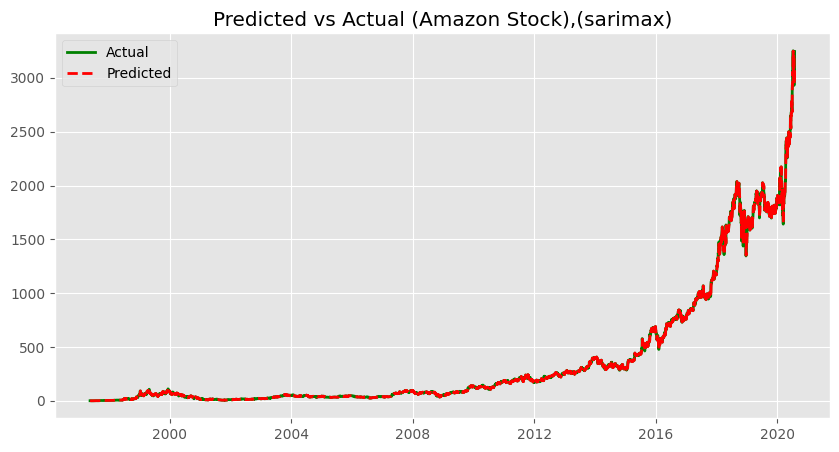

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(actual, label='Actual', color='green')
plt.plot(pred_actual_scale, label='Predicted',color='red', linestyle='--')
plt.title("Predicted vs Actual (Amazon Stock),(sarimax)")
plt.legend()
plt.show()


In [ ]:
from prophet import Prophet
import pandas as pd

# Prepare the data
df = amazonOpen.reset_index()  # reset index to get date as column
df = df.rename(columns={'Date': 'ds', 'Open': 'y'})

# Optional: Log transform if prices are volatile
df['y'] = np.log(df['y'])


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4b7_g3e3/fr0x45yd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4b7_g3e3/lqgvmgxm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15565', 'data', 'file=/tmp/tmp4b7_g3e3/fr0x45yd.json', 'init=/tmp/tmp4b7_g3e3/lqgvmgxm.json', 'output', 'file=/tmp/tmp4b7_g3e3/prophet_model2wf8h5p5/prophet_model-20250702155509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:55:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=30, freq='B')  # 'B' = business day
forecast = model.predict(future)


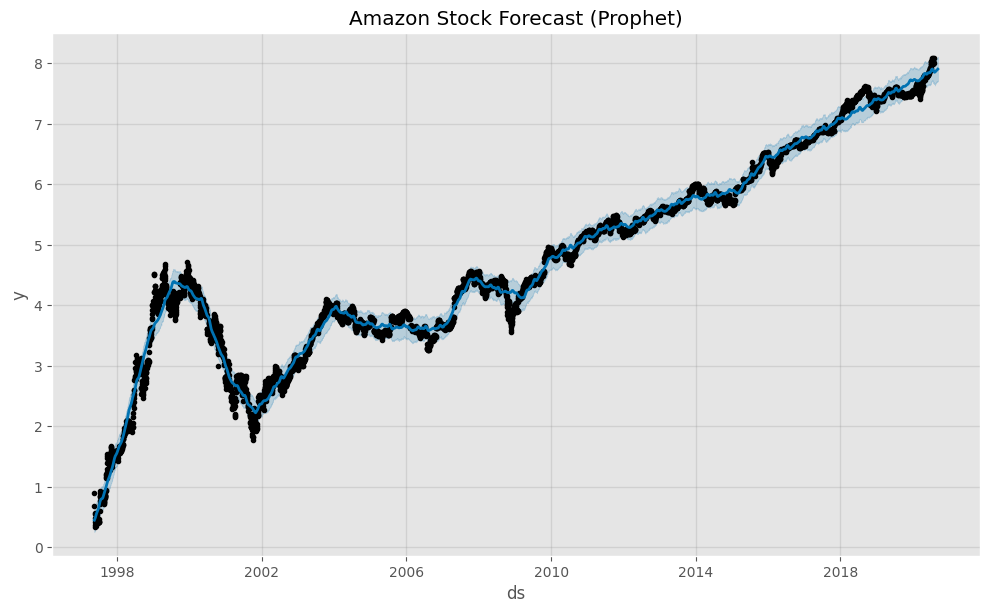

In [ ]:
model.plot(forecast)
plt.title("Amazon Stock Forecast (Prophet)")
plt.show()


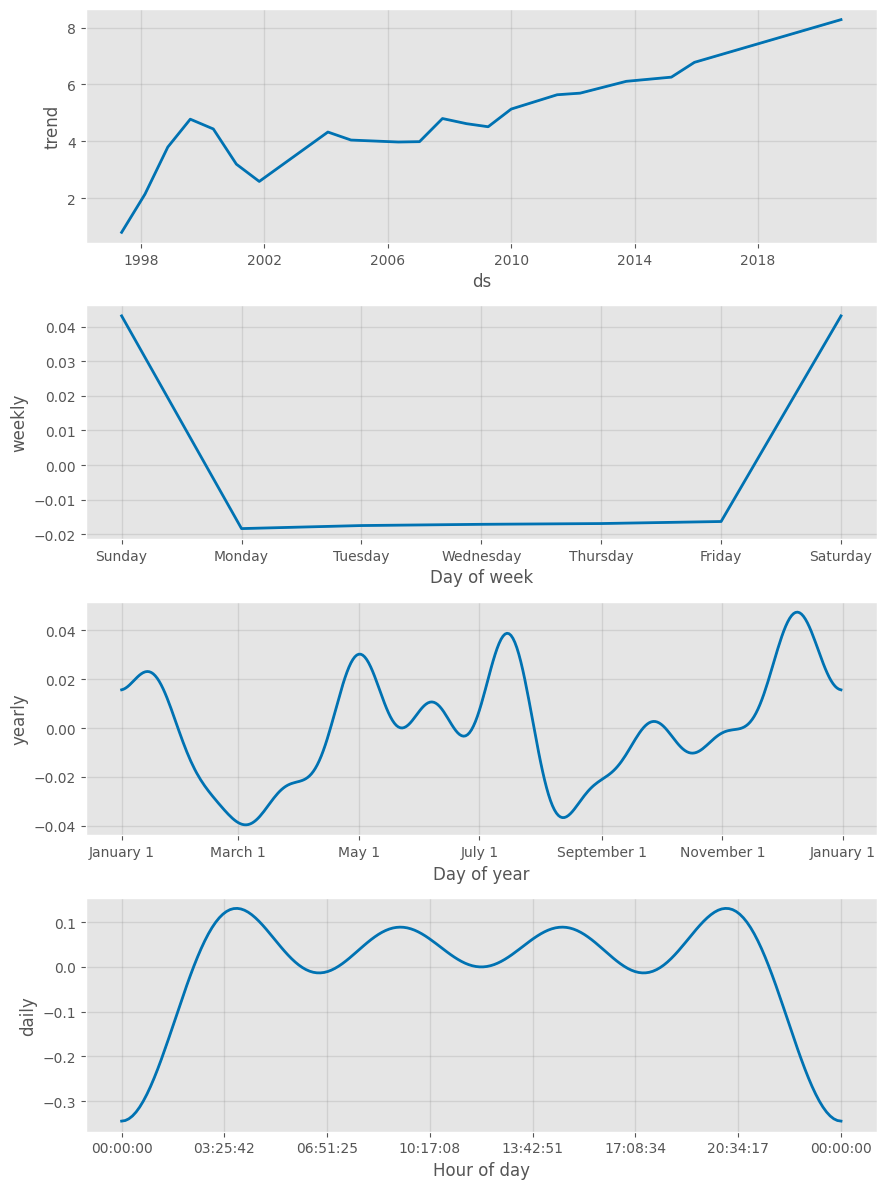

In [ ]:
model.plot_components(forecast)
plt.show()


In [ ]:
forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])


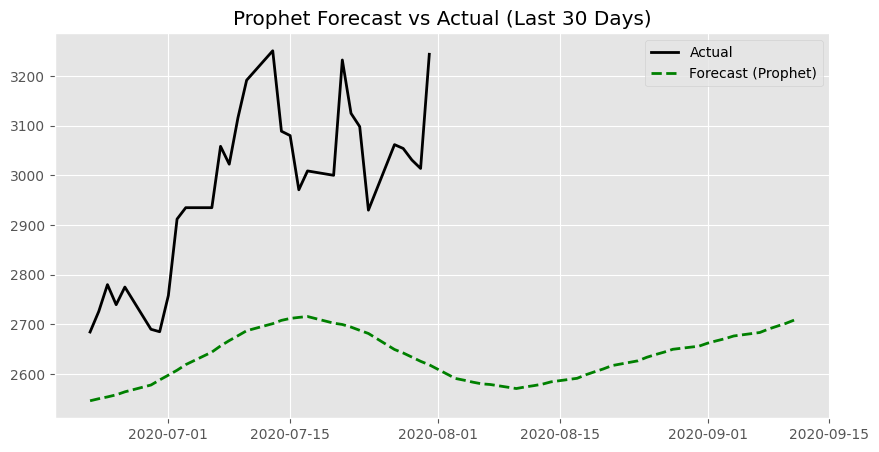

In [ ]:
pred = forecast.set_index('ds').loc[df['ds'].iloc[-30]:, 'yhat']
actual = np.exp(df.set_index('ds').loc[df['ds'].iloc[-30]:, 'y'])

plt.figure(figsize=(10,5))
plt.plot(actual, label='Actual', color='black')
plt.plot(pred, label='Forecast (Prophet)', color='green', linestyle='--')
plt.title("Prophet Forecast vs Actual (Last 30 Days)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
()

()